In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from pandas import DataFrame
from numpy import array

Using TensorFlow backend.


In [2]:
# return training data
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = array(seq)
    X, y = seq[:,0], seq[:,1]
    X = X.reshape((len(X), 1, 1))
    return X, y

In [3]:
# return validation data
def get_val():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = array(seq)
    X, y = seq[:,0], seq[:,1]
    X = X.reshape((len(X), 1, 1))
    return X, y

In [5]:
# fit an LSTM model
def fit_model(n_batch):
    # define model
    model = Sequential()
    model.add(LSTM(10, input_shape=(1, 1)))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mse', optimizer='adam')
    # fit model
    X, y = get_train()
    model.fit(X, y, epochs=500, shuffle=False, verbose=0, batch_size=n_batch)
    # evaluate model
    valX, valY = get_val()
    loss = model.evaluate(valX, valY, verbose=0)
    return loss

W1123 15:00:06.512822  9244 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1123 15:00:06.541002  9244 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1123 15:00:06.545040  9244 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1123 15:00:06.972114  9244 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1123 15:00:07.452799  9244 deprecation.py:323] From C:\Users\Lenovo\Anacond

>1/5 param=1.000000, loss=0.000293
>2/5 param=1.000000, loss=0.000968
>3/5 param=1.000000, loss=0.000052
>4/5 param=1.000000, loss=0.000911
>5/5 param=1.000000, loss=0.002887
>1/5 param=2.000000, loss=0.001279
>2/5 param=2.000000, loss=0.000556
>3/5 param=2.000000, loss=0.000821
>4/5 param=2.000000, loss=0.000406
>5/5 param=2.000000, loss=0.000458
>1/5 param=3.000000, loss=0.005220
>2/5 param=3.000000, loss=0.001255
>3/5 param=3.000000, loss=0.000402
>4/5 param=3.000000, loss=0.005913
>5/5 param=3.000000, loss=0.020773


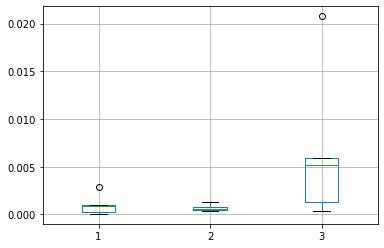

In [6]:
# define scope of search
params = [1, 2, 3]
n_repeats = 5
# grid search parameter values
scores = DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print('>%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values
    
scores.describe()
# box and whisker plot of results
scores.boxplot()
pyplot.show()